# Aula 06 - RNA (Redes Neuraus Artificiais)

Tópicos da aula de Hoje:

* Perceptron
* MLP
* Keras API - Tensorflow
* Model Fully connected
* Exemplo Pima Diabetes

In [53]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [55]:
df = pd.read_csv('diabetes.csv')

In [56]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
x_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [59]:
px.violin(df['Pregnancies'])

In [60]:
df['Pregnancies'].max()

17

In [61]:
px.histogram(df, x='BMI')

In [62]:
df.drop(df[df.Glucose < 20].index, inplace=True)
df.drop(df[df.BloodPressure < 15].index, inplace=True)
df.drop(df[df.BMI < 10].index, inplace=True)


In [63]:
media_SkinThickness = df['SkinThickness'].mean()
media_Insulin = df['Insulin'].mean()

In [64]:
df['SkinThickness'] = np.where(df['SkinThickness'] < 5, media_SkinThickness, df['SkinThickness'])
df['Insulin'] = np.where(df['Insulin'] < 10, media_Insulin, df['Insulin'])

In [65]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48.00000,180.000000,32.9,0.171,63,0
764,2,122,70,27.00000,84.494475,36.8,0.340,27,0
765,5,121,72,23.00000,112.000000,26.2,0.245,30,0
766,1,126,60,21.44337,84.494475,30.1,0.349,47,1
767,1,93,70,31.00000,84.494475,30.4,0.315,23,0


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,27.130010,123.240560,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.645083,94.398997,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.443370,84.494475,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,84.494475,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [66]:
X = df.get(x_features).values

In [67]:
y = df.get('Outcome').values

In [68]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Rede Neural - Modelo

In [81]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [78]:
X.shape[1]

8

In [96]:
model = tf.keras.models.Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [97]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])   # loss='mean_squared_error'

In [100]:
model.fit(X_train, 
          y_train, 
          # validation_split=0.15,
        #   validation_data=(X_test, y_test), 
          epochs=60, 
          shuffle=True) 
          # callbacks=[es])

Epoch 1/60
19/19 [==============================] - 1s 80ms/step - loss: 14741.1396 - accuracy: 0.5959
Epoch 2/60
19/19 [==============================] - 0s 6ms/step - loss: 74390.2109 - accuracy: 0.5596
Epoch 3/60
19/19 [==============================] - 0s 6ms/step - loss: 76371.4219 - accuracy: 0.5855
Epoch 4/60
19/19 [==============================] - 0s 6ms/step - loss: 77551.3750 - accuracy: 0.5924
Epoch 5/60
19/19 [==============================] - 0s 6ms/step - loss: 74226.1172 - accuracy: 0.5872
Epoch 6/60
19/19 [==============================] - 0s 7ms/step - loss: 52301.0000 - accuracy: 0.6149
Epoch 7/60
19/19 [==============================] - 0s 6ms/step - loss: 93097.9062 - accuracy: 0.5665
Epoch 8/60
19/19 [==============================] - 0s 6ms/step - loss: 113380.2344 - accuracy: 0.5803
Epoch 9/60
19/19 [==============================] - 0s 6ms/step - loss: 61511.7578 - accuracy: 0.6200
Epoch 10/60
19/19 [==============================] - 0s 6ms/step - loss: 55896.5

In [99]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 13ms/step - loss: 41303.4141 - accuracy: 0.4966


[41303.4140625, 0.4965517222881317]

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                720       
                                                                 
 dense_1 (Dense)             (None, 20)                1620      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2361 (9.22 KB)
Trainable params: 2361 (9.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


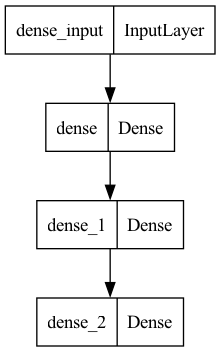

In [29]:
plot_model(model, to_file='model.png')

In [101]:
model.save('model.h5')

/opt/homebrew/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

